In [2]:
import numpy as np
from vectorize import load_json, save_json,vectorize
from pullDescriptions import getDesc
import scipy.cluster.hierarchy as hc
from sklearn.manifold import MDS,TSNE,Isomap
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import ConfusionMatrixDisplay
from cluster_comparison import compare
import nltk
from sklearn.metrics import f1_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN,KMeans
from scipy.signal import savgol_filter
from sklearn.metrics import silhouette_samples
from scipy.spatial.distance import cdist
from sklearn_extra.cluster import KMedoids
from kneed import DataGenerator, KneeLocator
from unionFind import UnionFind
%cd ./NCDBasedChecker
from NCDBasedChecker import utils
from NCDClusterer import NCDClusterer,Clusterer
%cd ..

C:\Python39\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


c:\Users\vikram14\Desktop\Research\IntelliDiff\NCDBasedChecker
c:\Users\vikram14\Desktop\Research\IntelliDiff


In [3]:
file_path='./comp116/116Q3Soln.json'

In [4]:
data = load_json(file_path)
methods = [{'studentID':k, 'code':v['solution'], 'label':"", 'description':""}for k,v in data.items()]

In [5]:
sub_arr= utils.methodArray_to_SubmissionArray(methods,[(methods[i]['studentID'],i) for i in range(len(methods))] ,mode='tok',lang='python',obf_var=True)
clusterer = NCDClusterer(None, sub_arr)
res = clusterer.checkShuffleSimilarity(b=256, s=128,adaptive_windows=True)
norm_res =(res - np.min(res))/(np.max(res)-np.min(res))

Pre-processing done!
calculating row: 0

calculating row: 1

calculating row: 2

calculating row: 3

calculating row: 4

calculating row: 5

calculating row: 6

calculating row: 7

calculating row: 8

calculating row: 9

calculating row: 10

calculating row: 11

calculating row: 12

calculating row: 13

calculating row: 14

calculating row: 15

calculating row: 16

calculating row: 17

calculating row: 18

calculating row: 19

calculating row: 20

calculating row: 21

calculating row: 22

calculating row: 23

calculating row: 24

calculating row: 25

calculating row: 26

calculating row: 27

calculating row: 28

calculating row: 29

calculating row: 30

calculating row: 31

calculating row: 32

calculating row: 33

calculating row: 34

calculating row: 35

calculating row: 36

calculating row: 37

calculating row: 38

calculating row: 39

calculating row: 40

calculating row: 41

calculating row: 42

calculating row: 43

calculating row: 44

calculating row: 45

calculating row: 46

ca

In [25]:
unionFind=UnionFind([m['studentID']for m in methods])
for i in range(len(methods)):
    for j in range(i+1,len(methods)):
        if(norm_res[i,j]<=0.01):
            unionFind.union(methods[i]['studentID'], methods[j]['studentID'])
             
unique_solns = {}
for solution in methods:
    key = unionFind.find(solution['studentID']) 
    if key not in unique_solns:
        unique_solns[key] = []
    unique_solns[key].append(solution)
unique_solns_summary=[(k,len(v)) for k,v in unique_solns.items()]
unique_solns_summary=sorted(unique_solns_summary,reverse=True,key=lambda x: x[1])

<BarContainer object of 2 artists>

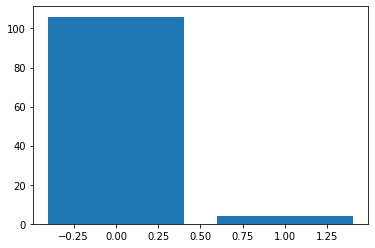

In [26]:
plt.bar(range(0,len(unique_solns_summary)),[x[1] for x in unique_solns_summary])

In [ ]:
# percentage in top k solution classes:
k=5
total=0
for i in range(k):
    print(unique_solns_summary[i][1])
    total+=unique_solns_summary[i][1]
print(total/len(methods)*100)
print(len(unique_solns))

In [15]:
mds_vectors_24dim = MDS(n_components=24,dissimilarity='precomputed').fit_transform(norm_res)

0.6153846153846154

In [ ]:
kmeans = KMeans(n_clusters=4,max_iter=10000)
kmeans.fit(mds_vectors_24dim)

In [ ]:
labels_med= kmeans.labels_

In [ ]:
clusters={i:[] for i in labels_med} #if i>0}
sims={i:[] for i in labels_med}
for i,m in enumerate(methods):
    # if(labels[i]<=0):
    #     continue
    clusters[labels_med[i]].append((m['code'],m['description'],m['studentID']))
    sims[labels_med[i]].append(i)



for k,v in clusters.items():
    print(f"GROUP : {k} SIZE : {len(v)}")
    print()    
    for m in v:
        print(f'{m[2]}')
        print('-'+'\n-'.join(nltk.sent_tokenize(m[1])))
        print(m[0])
        print("\n ######")
    print("\n***********************************************")

In [29]:
i=0
for k,v in unique_solns.items():
    print(f"******GROUP {i+1}*********")
    print(f"      ***SIZE: {len(unique_solns[k])}****")
    for solution in unique_solns[k]:
        print(solution['studentID'])
        print(solution['code'])
        print("")
    print("")

******GROUP 1*********
      ***SIZE: 106****
student068
# cell 8 of 14

def syllable_count(temp_text):
    '''Return the number of syllables'''
    # num_syllables: the number of syllables in the string temp_text
    num_syllables = 0
    clean_list = []
    clean_word = ""
    for word in temp_text.lower().split(" "):
        if(word.isalpha()):
            clean_list.append(word)
        else:
            for char in word:
                if(char.isalpha()):
                    clean_word += char
            clean_list.append(clean_word)
            clean_word = ''
    for word in clean_list:
        if len(word) <= 3:
                num_syllables += 1
        if len(word) >= 4:
            for char in word:
                    if char  == 'a' or char == 'i' or char == 'o' or char == 'u' or char == 'e':
                        num_syllables += 1
            if  word.endswith('es') or word.endswith('ed') or word.endswith('e'):
                    num_syllables -= 1
            if(wo

In [12]:
b='./comp116/116Q2Soln-NCD-KMeans-24dim-1.json'
a= './comp116/116Q2Solns_Manual_Labeled_With_Rare_new.json'
pred=load_json(b)
man = load_json(a)

In [15]:
s1=set([k for k,v in pred.items() if v['label']=='1'])
s2=set([k for k,v in man.items() if v['label_order1']=='2'])
s1.difference(s2)

{'student032'}

In [16]:
s1=set([k for k,v in pred.items() if v['label']=='3'])
s2=set([k for k,v in man.items() if v['label_order1']=='3'])
s1.difference(s2)

{'student030'}

*********************************

iou:{('2', '1'): 0.4222222222222222, ('1', '4'): 0.24561403508771928, ('3', '3'): 0.5873015873015873, ('0', '2'): 0.578125}


accuracy:{('2', '1'): 0.8260869565217391, ('1', '4'): 0.5, ('3', '3'): 0.6607142857142857, ('0', '2'): 0.6065573770491803}

rand score: 0.7405189620758483
adjusted rand score: 0.336079601504632
normalized mutual information: 0.3891318866800656
fowlkes mallows score: 0.5128189996121909
confusion matrix:
    (0,0) - True Negatives. Pair is not clustered together in the predicted and manual clustering.
    (0,1) - False Positives. Pair is clustered together in prediction but not manual clustering.
    (1,0) - False Negatives. Pair is not clustered together in prediction but is clustered together in manual clustering.
    (1,1) - True Positives.  Pair is clustered together in the predicted and manual clustering.



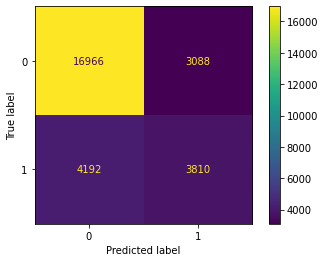

In [17]:
file_path_manual= './comp116/116Q2Solns_Manual_Labeled_With_Rare_new.json'
file_path_openai_jaccard='./comp116/116Q2Soln-OPENAI-Jaccard-4clust.json'
cfd=compare(file_path_openai_jaccard, file_path_manual).plot()

*********************************

iou:{('2', '1'): 1.0, ('1', '2'): 0.9838709677419355, ('0', '4'): 0.9285714285714286, ('3', '3'): 0.9824561403508771}


accuracy:{('2', '1'): 1.0, ('1', '2'): 1.0, ('0', '4'): 0.9285714285714286, ('3', '3'): 1.0}

rand score: 0.9878813800969489
adjusted rand score: 0.9704203772983354
normalized mutual information: 0.957095447578887
fowlkes mallows score: 0.9789546944804739
confusion matrix:
    (0,0) - True Negatives. Pair is not clustered together in the predicted and manual clustering.
    (0,1) - False Positives. Pair is clustered together in prediction but not manual clustering.
    (1,0) - False Negatives. Pair is not clustered together in prediction but is clustered together in manual clustering.
    (1,1) - True Positives.  Pair is clustered together in the predicted and manual clustering.



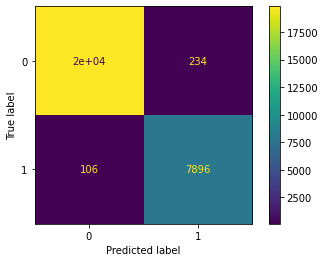

In [3]:
compare('./comp116/116Q2Soln-NCD-KMeans-24dim-1.json', './comp116/116Q2Solns_Manual_Labeled_With_Rare_new.json').plot()